Sentiment Analysis Comparison Notebook

Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment of a piece of text. Sentiment analysis involves analyzing the text to determine whether it is positive, negative, or neutral. Sentiment analysis can be used to analyze social media posts, customer reviews, and other types of user-generated content.


Import all necessary libraries



In [21]:
#importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [7]:
!pip install datasets

First we will see VADER and TextBlob for sentiment analysis as you don't need to train them for  sentiment analysis; they are pre-trained, lexicon-based tools that you can use directly for analyzing text sentiment.   Relevant articles are attached in README file for references.

In [10]:
#importing necessary libraries for VADER sentiment analysis and using TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Download VADER lexicon for SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Sample data (sentences to analyze)
test_data = [
    "I absolutely love this movie! It's amazing!",
    "This product is terrible. I hate it!",
    "I feel okay about this experience, neither good nor bad.",
    "The restaurant was fantastic! I will come again.",
    "I can't stand the new update. It's frustrating.",
    "What a wonderful day! Everything went so well."
]

# VADER Sentiment Analysis
sia = SentimentIntensityAnalyzer()
y_pred_vader = [1 if sia.polarity_scores(text)['compound'] > 0 else 0 for text in test_data]

# TextBlob Sentiment Analysis
y_pred_textblob = [1 if TextBlob(text).sentiment.polarity > 0 else 0 for text in test_data]

# Display results
for i, text in enumerate(test_data):
    print(f"Text: {text}")
    print(f"VADER Sentiment: {'Positive' if y_pred_vader[i] == 1 else 'Negative'}")
    print(f"TextBlob Sentiment: {'Positive' if y_pred_textblob[i] == 1 else 'Negative'}")
    print("-" * 50)







Text: I absolutely love this movie! It's amazing!
VADER Sentiment: Positive
TextBlob Sentiment: Positive
--------------------------------------------------
Text: This product is terrible. I hate it!
VADER Sentiment: Negative
TextBlob Sentiment: Negative
--------------------------------------------------
Text: I feel okay about this experience, neither good nor bad.
VADER Sentiment: Negative
TextBlob Sentiment: Positive
--------------------------------------------------
Text: The restaurant was fantastic! I will come again.
VADER Sentiment: Positive
TextBlob Sentiment: Positive
--------------------------------------------------
Text: I can't stand the new update. It's frustrating.
VADER Sentiment: Negative
TextBlob Sentiment: Negative
--------------------------------------------------
Text: What a wonderful day! Everything went so well.
VADER Sentiment: Positive
TextBlob Sentiment: Positive
--------------------------------------------------


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Now, we will be using logistic regression, to classify reviews into positive or negative, and random forest classifier for giving more accurate results, as well as naive bayes classification.

In [12]:

from datasets import load_dataset
dataset = load_dataset("imdb")

In [13]:
# Combine train and test splits for preprocessing
texts = dataset["train"]["text"] + dataset["test"]["text"]
labels = dataset["train"]["label"] + dataset["test"]["label"]

TF-IDF Vectorization - (Term Frequency - Inverse Document Frequency) is a statistical measure used to evaluate how important a word is to a document in a collection

In [14]:
# Step 2: Preprocess the text data using TF-IDF
#used to remove unnecessary words from the text.
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")  # Limit to top 5000 features
X = vectorizer.fit_transform(texts)
y = np.array(labels)

Splitting the data into training and testing sets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the models -  Logistic Regression, Random Forest Classifier and Naive Bayes

In [16]:
print("Training Logistic Regression...")
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

print("Training Random Forest...")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Training Naive Bayes...")
nb = MultinomialNB()
nb.fit(X_train, y_train)


Training Logistic Regression...
Training Random Forest...
Training Naive Bayes...


MultinomialNB()

Evaluate the models and store th results.


Model: Logistic Regression
Accuracy: 0.8870, F1-score: 0.8873


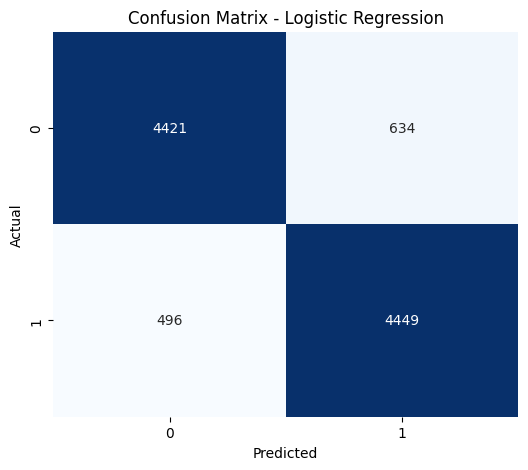


Model: Random Forest
Accuracy: 0.8450, F1-score: 0.8426


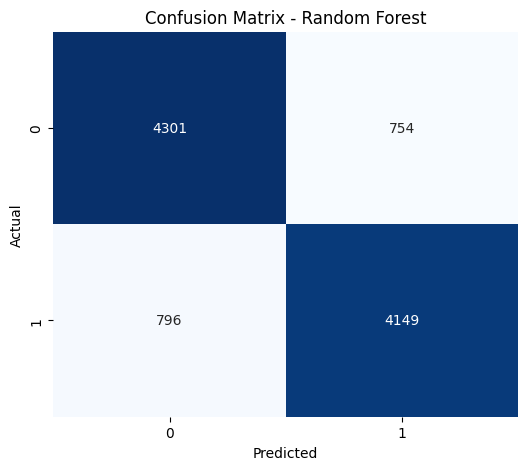


Model: Naive Bayes
Accuracy: 0.8529, F1-score: 0.8524


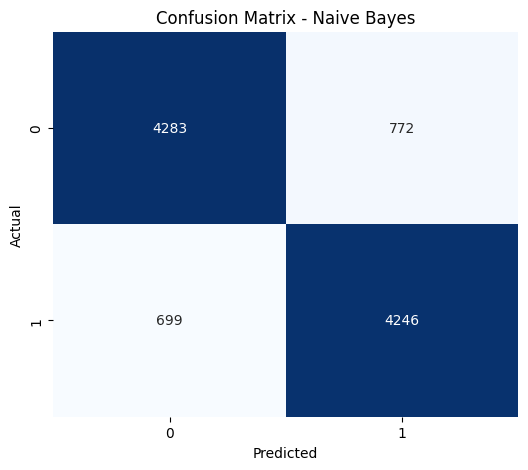

In [23]:
def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="binary")  # Binary classification
    cm = confusion_matrix(y_test, y_pred)

    return {
        "accuracy": accuracy,
        "f1_score": f1,
        "confusion_matrix": cm
    }
results = {
    "Logistic Regression": evaluate_model(logreg, X_test, y_test, "Logistic Regression"),
    "Random Forest": evaluate_model(rf, X_test, y_test, "Random Forest"),
    "Naive Bayes": evaluate_model(nb, X_test, y_test, "Naive Bayes")
}

# Print metrics and visualize confusion matrices
for model, metrics in results.items():
    print(f"\nModel: {model}")
    print(f"Accuracy: {metrics['accuracy']:.4f}, F1-score: {metrics['f1_score']:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Now we will test the models on sample sentences.

In [25]:
# Test the models with an example sentence
def predict_sentiment(sentence, model, vectorizer):
    # Transform the sentence into TF-IDF features
    X_sentence = vectorizer.transform([sentence])

    # Predict the sentiment
    prediction = model.predict(X_sentence)[0]
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

example_sentence = "I absolutely loved this movie! The acting was superb and the story was fresh and captivating."
example2 = "It was a bad movie, I did not enjoy it at all."

print("\nTesting Models on Example Sentence:")
print(f"Sentence: {example_sentence}")
print("Logistic Regression Prediction:", predict_sentiment(example_sentence, logreg, vectorizer))
print("Random Forest Prediction:", predict_sentiment(example_sentence, rf, vectorizer))
print("Naive Bayes Prediction:", predict_sentiment(example_sentence, nb, vectorizer))
print(f"Sentence: {example2}")
print("Logistic Regression Prediction:", predict_sentiment(example2, logreg, vectorizer))
print("Random Forest Prediction:", predict_sentiment(example2, rf, vectorizer))
print("Naive Bayes Prediction:", predict_sentiment(example2, nb, vectorizer))



Testing Models on Example Sentence:
Sentence: I absolutely loved this movie! The acting was superb and the story was fresh and captivating.
Logistic Regression Prediction: Positive
Random Forest Prediction: Positive
Naive Bayes Prediction: Positive
Sentence: It was a bad movie, I did not enjoy it at all.
Logistic Regression Prediction: Negative
Random Forest Prediction: Negative
Naive Bayes Prediction: Negative


Key takeaways:
1. Traditional ML models are computationally efficient and faster to train compared to deep learning models.
2. Traditional ML models reuquire feature engineering methods like TF-IDF.
3. Data quality and preprocessing play a critical role in model performance.

The above methods were the traditional methods used for sentiment analysis and now that we have compared their accuracy and other performance metrics, we will now explore some other advanced NLP based models to see how they perform , also for these you might need GPU environment which can be run on Google Colab as these algos might take too long to run on CPU.

In [2]:
!pip install tensorflow transformers datasets  #install dependencies.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which 

In [4]:
import tensorflow as tf
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

#  Load the IMDb dataset
dataset = load_dataset("imdb")

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Apply tokenization to the dataset
#tokenization basically breaks big sentences into smaller words for easier understanding by the machine.
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Rename the "label" column to "labels" to match the expected input format
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")

# Prepare TensorFlow datasets
train_dataset = tokenized_datasets["train"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    shuffle=True,
    batch_size=16
)

test_dataset = tokenized_datasets["test"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    shuffle=False,
    batch_size=16
)

#  Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy")]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Step 6: Train the model
print("Training the model...")
history = model.fit(train_dataset, epochs=1)  # Reduced epochs for quick testing
#if you want to increase accuracy you may increase it to 3 but the time would also increase.

# Evaluate the model
print("Evaluating the model...")
results = model.evaluate(test_dataset)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

#  Test the model with an example sentence
def predict_sentiment(sentence):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors="tf", padding="max_length", truncation=True, max_length=128)

    # Get the model's predictions
    logits = model(inputs).logits

    # Convert logits to probabilities and get the predicted class
    probabilities = tf.nn.softmax(logits, axis=-1)
    predicted_class = tf.argmax(probabilities, axis=-1).numpy()[0]

    # Map the predicted class to sentiment
    sentiment = "Positive" if predicted_class == 1 else "Negative"
    return sentiment, probabilities.numpy()[0]

# Example sentence to test
example_sentence = "I absolutely loved this movie! The acting was superb and the story was captivating."

sentiment, probabilities = predict_sentiment(example_sentence)


print(f"Sentence: {example_sentence}")
print(f"Predicted Sentiment: {sentiment}")
print(f"Probabilities: Negative={probabilities[0]:.4f}, Positive={probabilities[1]:.4f}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Training the model...
1563/1563 [==============================] - 698s 422ms/step - loss: 0.3337 - accuracy: 0.8512
Evaluating the model...
1563/1563 [==============================] - 235s 148ms/step - loss: 0.2693 - accuracy: 0.8844
Test Loss: 0.2693415880203247, Test Accuracy: 0.884440004825592
Sentence: I absolutely loved this movie! The acting was superb and the story was captivating.
Predicted Sentiment: Positive
Probabilities: Negative=0.0044, Positive=0.9956


As you can see, we achieved 88.4
% accuracy here.
Key Takeaways:
1. BERT captures the meaning of words in context, which is critical for understanding nuanced language.
Unlike traditional models (e.g., Logistic Regression, Naive Bayes) that treat words independently, BERT considers the entire sentence structure and relationships between words.
2. It can understand sarcastic sentences as well.
3. It is computationally expensive and slower than the traditional methods, but if trained well on the datasets, provides very high accuracies.